In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date

# Context

Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.

Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

## Problem Statement
In this dataset, the column 'Response' indicates whether or not the customer have accepted the offer in the last (sixth) campaign. So, for this project, I am interested in predicting participation with future campaigns based on the customer's records from a supermarket database. If we are able to predict the customer's involvment with future campaigns using this information, a business could promote their offers to customers that are more likely to accept the offer. This in result would also help the business to create a more efficient marketing plan.

## Acknowledgement
The dataset for this project is provided by Dr. Omar Romero-Hernandez.

## Columns
### People

**ID:** Customer's unique identifier


**Year_Birth:** Customer's birth year

**Education:** Customer's education level

**Marital_Status:** Customer's marital status

**Income:** Customer's yearly household income

**Kidhome:** Number of children in customer's household

**Teenhome:** Number of teenagers in customer's household

**Dt_Customer:** Date of customer's enrollment with the company

**Recency:** Number of days since customer's last purchase

**Complain:** 1 if the customer complained in the last 2 years, 0 otherwise

### Products

**MntWines:** Amount spent on wine in last 2 years

**MntFruits:** Amount spent on fruits in last 2 years

**MntMeatProducts:** Amount spent on meat in last 2 years

**MntFishProducts:** Amount spent on fish in last 2 years

**MntSweetProducts:** Amount spent on sweets in last 2 years

**MntGoldProds:** Amount spent on gold in last 2 years

### Promotion

**NumDealsPurchases:** Number of purchases made with a discount

**AcceptedCmp1:** 1 if customer accepted the offer in the 1st campaign, 0 otherwise

**AcceptedCmp2:** 1 if customer accepted the offer in the 2nd campaign, 0 otherwise

**AcceptedCmp3:** 1 if customer accepted the offer in the 3rd campaign, 0 otherwise

**AcceptedCmp4:** 1 if customer accepted the offer in the 4th campaign, 0 otherwise

**AcceptedCmp5:** 1 if customer accepted the offer in the 5th campaign, 0 otherwise

**Response:** 1 if customer accepted the offer in the last campaign, 0 otherwise

### Place

**NumWebPurchases:** Number of purchases made through the company’s website

**NumCatalogPurchases:** Number of purchases made using a catalogue

**NumStorePurchases:** Number of purchases made directly in stores

**NumWebVisitsMonth:** Number of visits to company’s website in the last month

## Cleaning Dataset + EDA

In [2]:
# import data
raw_df = pd.read_csv('marketing_campaign.csv', sep = '\t')
raw_df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [3]:
# How many row and columns does the dataset have
raw_df.shape

(2240, 29)

In [4]:
# Simple description of the data
raw_df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [5]:
# dtypes of the dataset
raw_df.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

In [6]:
# change DT_Customer to datetime
raw_df['Dt_Customer'] = pd.to_datetime(raw_df['Dt_Customer'], format='%d-%m-%Y')

In [7]:
# check if datetime dtype is changed
raw_df.dtypes

ID                              int64
Year_Birth                      int64
Education                      object
Marital_Status                 object
Income                        float64
Kidhome                         int64
Teenhome                        int64
Dt_Customer            datetime64[ns]
Recency                         int64
MntWines                        int64
MntFruits                       int64
MntMeatProducts                 int64
MntFishProducts                 int64
MntSweetProducts                int64
MntGoldProds                    int64
NumDealsPurchases               int64
NumWebPurchases                 int64
NumCatalogPurchases             int64
NumStorePurchases               int64
NumWebVisitsMonth               int64
AcceptedCmp3                    int64
AcceptedCmp4                    int64
AcceptedCmp5                    int64
AcceptedCmp1                    int64
AcceptedCmp2                    int64
Complain                        int64
Z_CostContac

In [8]:
# checking all the different values for each columns
raw_df.nunique()

ID                     2240
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1974
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

In [9]:
# drop columns Cost Contact and Revenue as all data are the same and I don't really know what the values stand for
raw_df = raw_df.drop(columns=['Z_CostContact', 'Z_Revenue'])

In [10]:
raw_df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,3,6,5,0,0,0,0,0,0,0


In [11]:
#Any missing values?
raw_df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Response                0
dtype: int64

In [12]:
# Should I drop the rows or insert some average values
raw_df[raw_df['Income'].isnull()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
10,1994,1983,Graduation,Married,NaN,1,0,2013-11-15,11,5,...,0,2,7,0,0,0,0,0,0,0
27,5255,1986,Graduation,Single,NaN,1,0,2013-02-20,19,5,...,0,0,1,0,0,0,0,0,0,0
43,7281,1959,PhD,Single,NaN,0,0,2013-11-05,80,81,...,3,4,2,0,0,0,0,0,0,0
48,7244,1951,Graduation,Single,NaN,2,1,2014-01-01,96,48,...,1,4,6,0,0,0,0,0,0,0
58,8557,1982,Graduation,Single,NaN,1,0,2013-06-17,57,11,...,0,3,6,0,0,0,0,0,0,0
71,10629,1973,2n Cycle,Married,NaN,1,0,2012-09-14,25,25,...,0,3,8,0,0,0,0,0,0,0
90,8996,1957,PhD,Married,NaN,2,1,2012-11-19,4,230,...,2,8,9,0,0,0,0,0,0,0
91,9235,1957,Graduation,Single,NaN,1,1,2014-05-27,45,7,...,0,2,7,0,0,0,0,0,0,0
92,5798,1973,Master,Together,NaN,0,0,2013-11-23,87,445,...,4,8,1,0,0,0,0,0,0,0
128,8268,1961,PhD,Married,NaN,0,1,2013-07-11,23,352,...,1,7,6,0,0,0,0,0,0,0


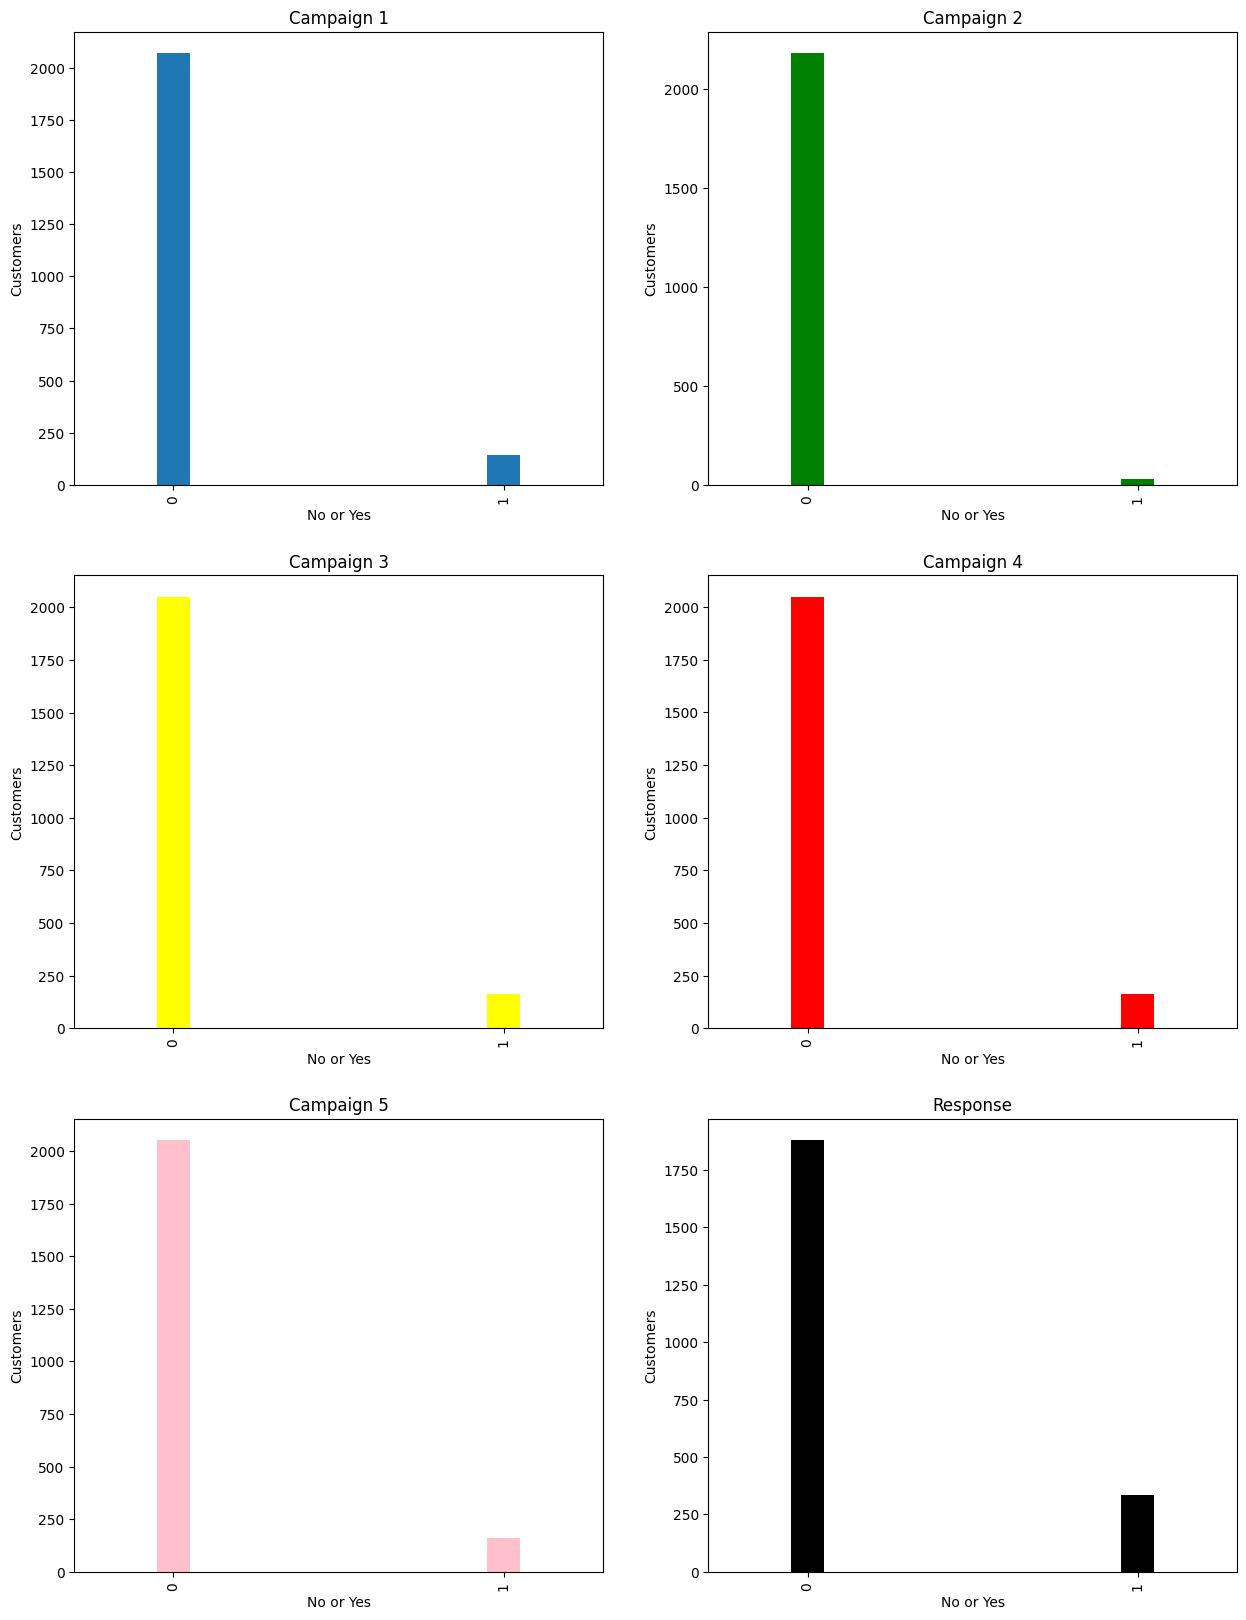

In [121]:
# First I should check how much dataset I have for each response to check if it will be balanced or imblanced.
# set number of bars
x = np.arange(5)
# set width of bar
width = 0.1

# set subplot and size of graphs
fig, ax = plt.subplots(ncols=2, nrows = 3, figsize = (15, 20))

# plot bar graph for each campaign offer with title, xlabel and ylabel
raw_df['AcceptedCmp1'].value_counts().plot.bar(width = width, ax = ax[0, 0], title='Campaign 1', xlabel='No or Yes', ylabel='Customers')
raw_df['AcceptedCmp2'].value_counts().plot.bar(width = width, color='green', ax = ax[0, 1], title='Campaign 2', xlabel='No or Yes', ylabel='Customers')
raw_df['AcceptedCmp3'].value_counts().plot.bar(width = width, color='yellow', ax = ax[1, 0], title='Campaign 3', xlabel='No or Yes', ylabel='Customers')
raw_df['AcceptedCmp4'].value_counts().plot.bar(width = width, color='red', ax = ax[1, 1], title='Campaign 4', xlabel='No or Yes', ylabel='Customers')
raw_df['AcceptedCmp5'].value_counts().plot.bar(width = width, color='pink', ax = ax[2, 0], title='Campaign 5', xlabel='No or Yes', ylabel='Customers')
raw_df['Response'].value_counts().plot.bar(width = width, color='black', ax = ax[2, 1], title='Response', xlabel='No or Yes', ylabel='Customers')

# Show chart
plt.show()

In [14]:
# Because the response is quite imbalanced I drop all NA rows except for the only one with yes response.
# before that I should input a subsitute income for that row.

# she is born in the year 1943 with a Masters, so probably the average income between these 2.
raw_df[(raw_df['Education'] == 'Master') & (raw_df['Year_Birth'] == 1943)]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
358,6142,1943,Master,Married,65073.0,0,0,2013-08-20,65,629,...,3,5,2,0,0,0,0,0,1,0
1923,4994,1943,Master,Single,77598.0,0,0,2013-10-01,53,1193,...,5,13,3,0,0,1,0,0,0,0
2084,5250,1943,Master,Widow,NaN,0,0,2013-10-30,75,532,...,5,11,1,0,0,1,0,0,0,1


In [15]:
# calculate average:
(65073.0+77598.0)/2

71335.5

In [16]:
# input average income:
raw_df.at[2084, 'Income'] = 71335

In [17]:
# check if implemented
raw_df['Income'].isnull().sum()

23

In [18]:
# drop the other NA values
raw_df = raw_df.dropna()

<AxesSubplot: title={'center': 'Income Distribution'}, xlabel='Income', ylabel='Frequency'>

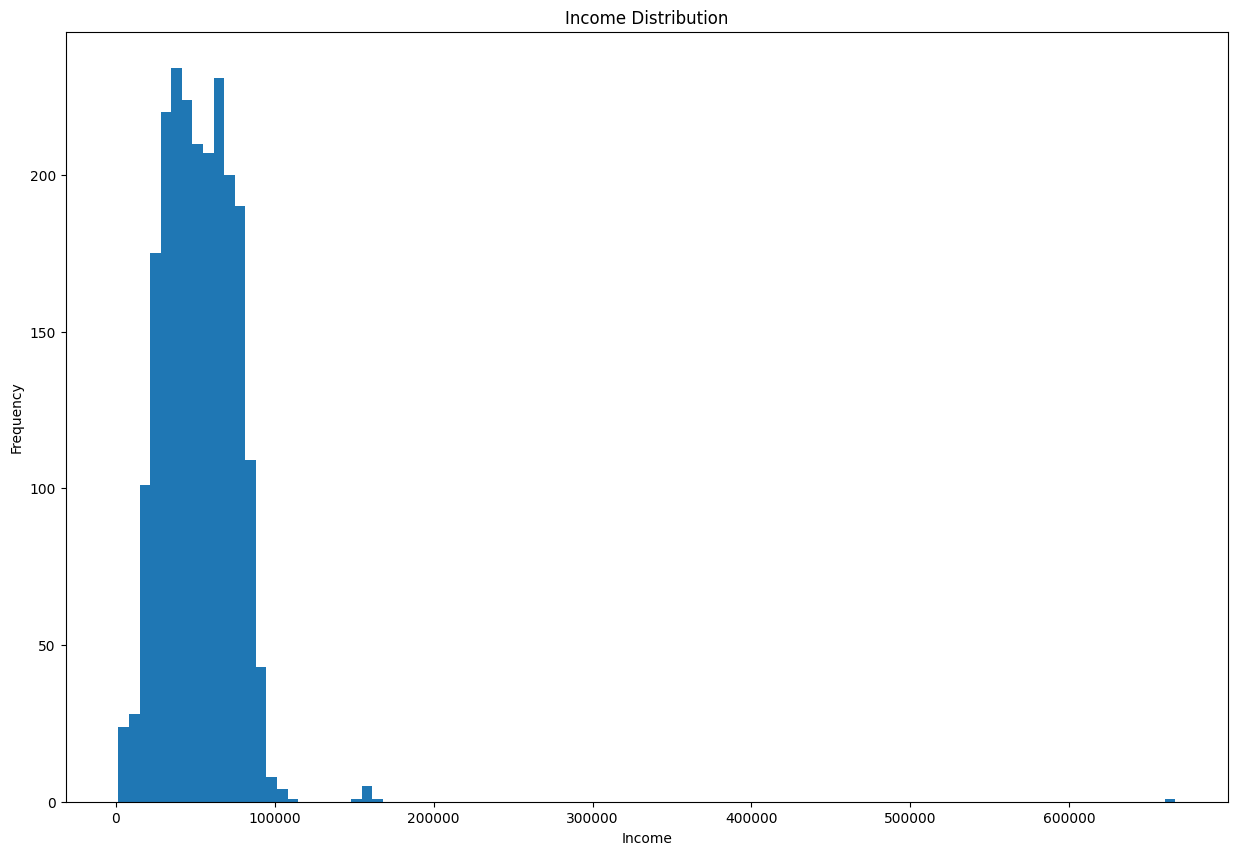

In [19]:
#Visualisation of Income of all customers
plt.figure(figsize = (15, 10))
plt.xlabel('Income')
raw_df['Income'].plot(kind = 'hist', bins=100, title='Income Distribution')
# There is one income that is very far away

In [20]:
# Finding the outlier income value
print(f'Income Outlier: {raw_df["Income"].max()}')

Income Outlier: 666666.0


In [21]:
# Finding the row with this income value
raw_df[raw_df['Income'] == 666666]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
2233,9432,1977,Graduation,Together,666666.0,1,0,2013-06-02,23,9,...,1,3,6,0,0,0,0,0,0,0


In [22]:
# Dropping this row
raw_df = raw_df.drop(index = 2233)

<AxesSubplot: title={'center': 'Income Distribution'}, xlabel='Income', ylabel='Frequency'>

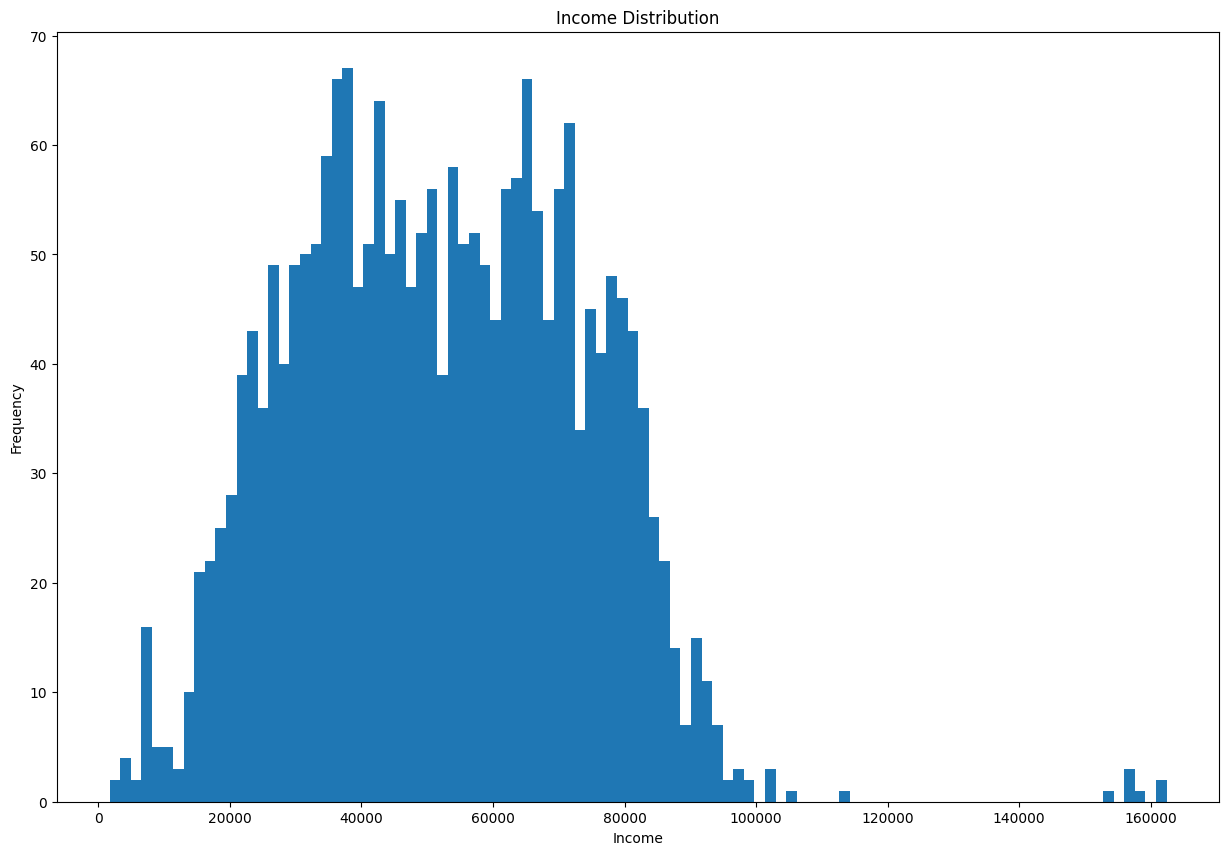

In [23]:
# check if outlier value is dropped
# New visualisation of Income of all customers
plt.figure(figsize = (15, 10))
plt.xlabel('Income')
raw_df['Income'].plot(kind = 'hist', bins=100, title='Income Distribution')

In [24]:
# Instead of birth year, age might be more informative and easier to understand
raw_df['Age'] = 2021 - raw_df.Year_Birth.to_numpy()
raw_df.drop('Year_Birth', axis=1, inplace=True)

In [25]:
raw_df.head()

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age
0,5524,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,...,4,7,0,0,0,0,0,0,1,64
1,2174,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,...,2,5,0,0,0,0,0,0,0,67
2,4141,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,...,10,4,0,0,0,0,0,0,0,56
3,6182,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,...,4,6,0,0,0,0,0,0,0,37
4,5324,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,...,6,5,0,0,0,0,0,0,0,40


<AxesSubplot: title={'center': 'Age Distribution of Customers'}, xlabel='Age', ylabel='Frequency'>

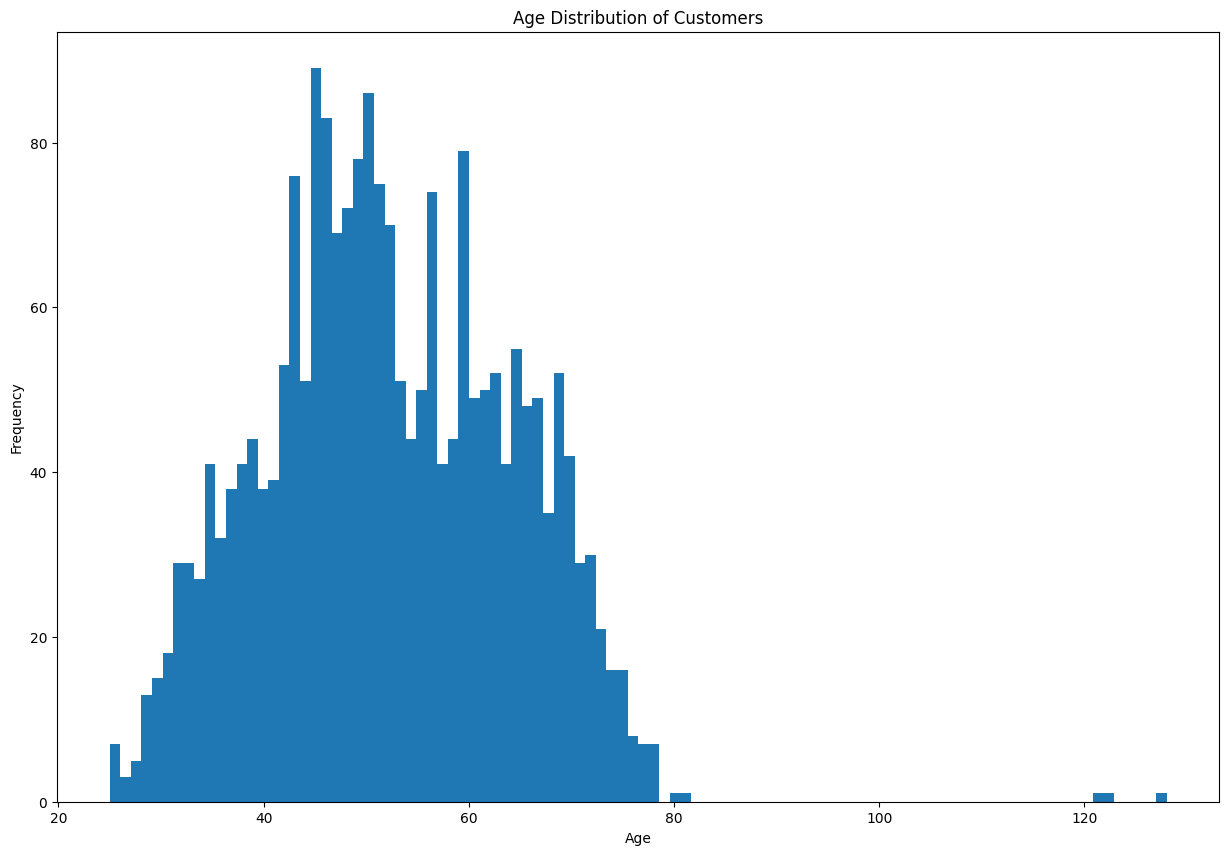

In [26]:
# Visualisation of age of all customers
plt.figure(figsize = (15, 10))
plt.xlabel('Age')
raw_df['Age'].plot(kind = 'hist', bins=100, title='Age Distribution of Customers')

# The dataset might be quite old as I don't really think they would be alive at 120~

In [27]:
# because the response for these customers are also 0, I think we are able to drop the 3 that are over 120
raw_df.sort_values('Age')

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age
46,9909,2n Cycle,Married,7500.0,0,0,2012-11-09,24,3,18,...,3,9,0,0,0,0,0,0,1,25
1170,193,Basic,Married,14421.0,0,0,2014-02-17,81,0,0,...,2,5,1,0,0,0,0,0,0,25
995,5184,Graduation,Single,34824.0,0,0,2014-03-26,65,4,2,...,2,6,0,0,0,0,0,0,0,26
747,10548,Graduation,Single,71163.0,0,0,2014-03-09,30,283,17,...,12,1,0,0,0,0,0,0,0,26
1850,4427,2n Cycle,Single,83257.0,0,0,2012-09-18,56,536,27,...,12,6,1,0,1,0,0,1,1,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424,6932,PhD,Married,93027.0,0,0,2013-04-13,77,1285,42,...,5,2,0,0,1,0,0,0,0,80
1950,6663,PhD,Single,51141.0,0,0,2013-07-08,96,144,0,...,4,5,0,0,0,0,0,0,0,81
192,7829,2n Cycle,Divorced,36640.0,1,0,2013-09-26,99,15,6,...,2,5,0,0,0,0,0,1,0,121
339,1150,PhD,Together,83532.0,0,0,2013-09-26,36,755,144,...,4,1,0,0,1,0,0,0,0,122


In [28]:
# drop the 3 rows
raw_df = raw_df.drop(index = [192, 339, 239])

<AxesSubplot: title={'center': 'Age Distribution of Customers'}, xlabel='Age', ylabel='Frequency'>

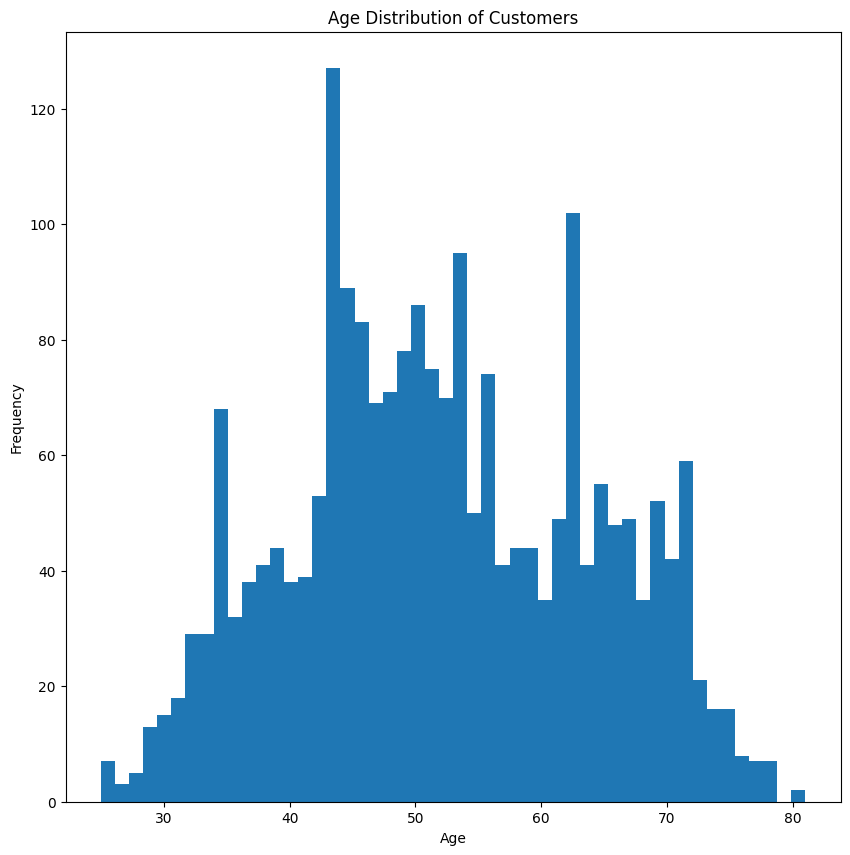

In [124]:
# Check if dropped by new Visualisation of age of all customers
plt.figure(figsize = (10, 10))
plt.xlabel('Age')
raw_df['Age'].plot(kind = 'hist', bins=50, title='Age Distribution of Customers')

In [30]:
# The ID row can be dropped as it doesn't give any context in this project
raw_df = raw_df.drop(columns='ID')

In [31]:
# check if ID is dropped
raw_df.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age
0,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,...,4,7,0,0,0,0,0,0,1,64
1,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,...,2,5,0,0,0,0,0,0,0,67
2,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,...,10,4,0,0,0,0,0,0,0,56
3,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,...,4,6,0,0,0,0,0,0,0,37
4,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,...,6,5,0,0,0,0,0,0,0,40


DT_customer can not be used for classification as the Dtype it is right now, how can I change it so that it can be used:
- If I can change the date to number of days since they were a customer.
- However where should I set the date?

I am pretty sure this dataset is for 2 years since complaint was set as within the 2 years.
- So with the earliest date and then plus 2 years as the 'beginning'

In [32]:
# finding the latest date
raw_df.sort_values('Dt_Customer').min()['Dt_Customer']

Timestamp('2012-07-30 00:00:00')

In [33]:
# Having the times as 1 variable
times = raw_df['Dt_Customer']
# So Day1 is set as 29/06/2012
d1 = pd.to_datetime('2014-7-30', format='%Y-%m-%d')
# empty list for all the days.
delta_days = []

# for the time in times minus from the initial date.
for time in times:
    Days = d1 - time
    # append the days to empty list.
    delta_days.append(Days)

In [34]:
# change to numeric and append to the dataframe
raw_df['Membership'] = delta_days

In [35]:
# check dataframe
raw_df.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Membership
0,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,...,7,0,0,0,0,0,0,1,64,694 days
1,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,...,5,0,0,0,0,0,0,0,67,144 days
2,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,...,4,0,0,0,0,0,0,0,56,343 days
3,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,...,6,0,0,0,0,0,0,0,37,170 days
4,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,...,5,0,0,0,0,0,0,0,40,192 days


In [36]:
# the days atm are in time delta dtype, change it to int
raw_df.dtypes

Education                       object
Marital_Status                  object
Income                         float64
Kidhome                          int64
Teenhome                         int64
Dt_Customer             datetime64[ns]
Recency                          int64
MntWines                         int64
MntFruits                        int64
MntMeatProducts                  int64
MntFishProducts                  int64
MntSweetProducts                 int64
MntGoldProds                     int64
NumDealsPurchases                int64
NumWebPurchases                  int64
NumCatalogPurchases              int64
NumStorePurchases                int64
NumWebVisitsMonth                int64
AcceptedCmp3                     int64
AcceptedCmp4                     int64
AcceptedCmp5                     int64
AcceptedCmp1                     int64
AcceptedCmp2                     int64
Complain                         int64
Response                         int64
Age                      

In [37]:
raw_df['Membership'] = raw_df['Membership'].dt.days

In [38]:
# change deltatime to int
raw_df.dtypes

Education                      object
Marital_Status                 object
Income                        float64
Kidhome                         int64
Teenhome                        int64
Dt_Customer            datetime64[ns]
Recency                         int64
MntWines                        int64
MntFruits                       int64
MntMeatProducts                 int64
MntFishProducts                 int64
MntSweetProducts                int64
MntGoldProds                    int64
NumDealsPurchases               int64
NumWebPurchases                 int64
NumCatalogPurchases             int64
NumStorePurchases               int64
NumWebVisitsMonth               int64
AcceptedCmp3                    int64
AcceptedCmp4                    int64
AcceptedCmp5                    int64
AcceptedCmp1                    int64
AcceptedCmp2                    int64
Complain                        int64
Response                        int64
Age                             int64
Membership  

In [39]:
raw_df.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Membership
0,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,...,7,0,0,0,0,0,0,1,64,694
1,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,...,5,0,0,0,0,0,0,0,67,144
2,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,...,4,0,0,0,0,0,0,0,56,343
3,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,...,6,0,0,0,0,0,0,0,37,170
4,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,...,5,0,0,0,0,0,0,0,40,192


In [69]:
# drop Dt Customer
raw_df = raw_df.drop(columns = 'Dt_Customer')

In [70]:
# Adding the total spending amount by adding up all the $ spend on each category
raw_df['Total Spend'] = raw_df['MntFishProducts']+raw_df['MntFruits']+raw_df['MntGoldProds']+raw_df['MntMeatProducts']+raw_df['MntSweetProducts']+raw_df['MntWines']

In [71]:
# check df
raw_df.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Membership,Total Spend
0,Graduation,Single,58138.0,0,0,58,635,88,546,172,...,0,0,0,0,0,0,1,64,694,1617
1,Graduation,Single,46344.0,1,1,38,11,1,6,2,...,0,0,0,0,0,0,0,67,144,27
2,Graduation,Together,71613.0,0,0,26,426,49,127,111,...,0,0,0,0,0,0,0,56,343,776
3,Graduation,Together,26646.0,1,0,26,11,4,20,10,...,0,0,0,0,0,0,0,37,170,53
4,PhD,Married,58293.0,1,0,94,173,43,118,46,...,0,0,0,0,0,0,0,40,192,422


<AxesSubplot: title={'center': 'Days since Customer First Visited'}, xlabel='Days', ylabel='Frequency'>

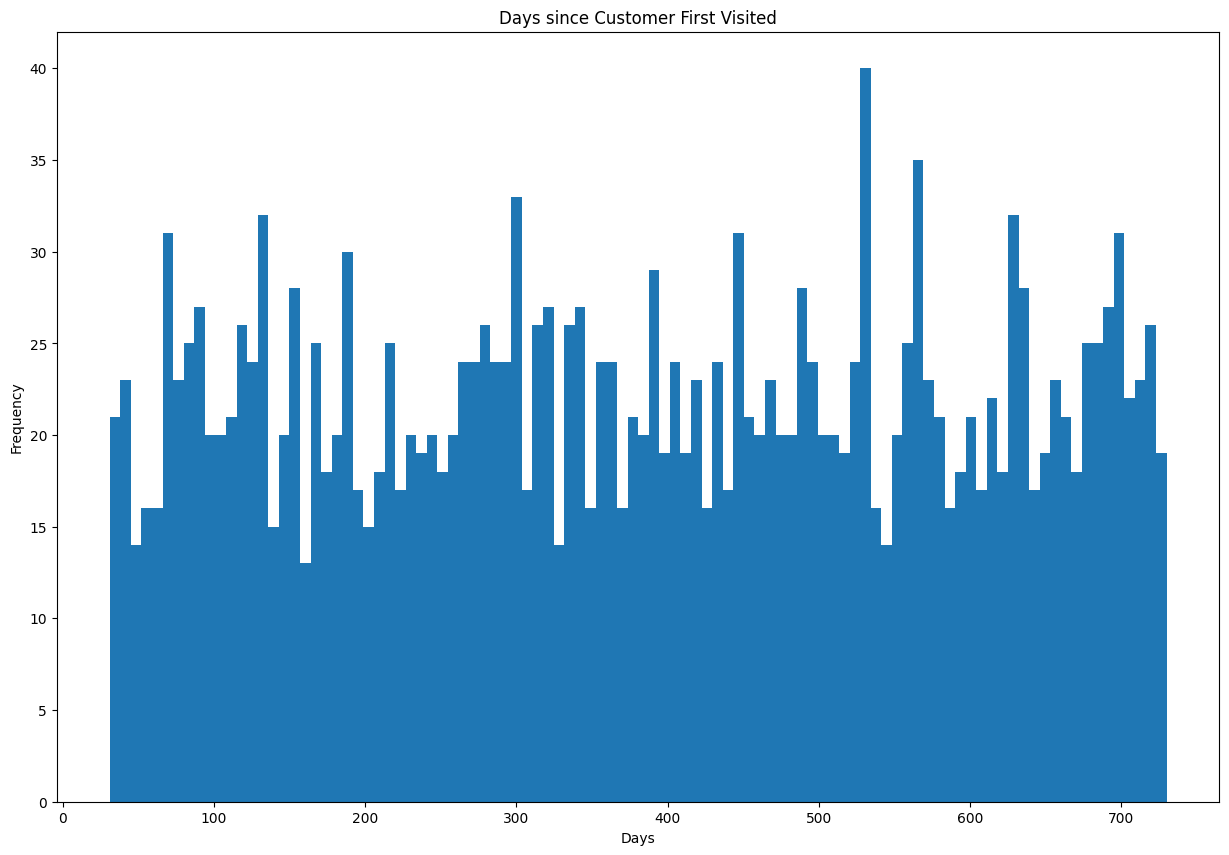

In [72]:
# Visualisation of Times since customers have been at the store
plt.figure(figsize = (15, 10))
plt.xlabel('Days')
raw_df['Membership'].plot(kind = 'hist', bins=100, title='Days since Customer First Visited')

# fairly random/equal

<AxesSubplot: title={'center': 'Last time since Customer visited'}, xlabel='Days', ylabel='Frequency'>

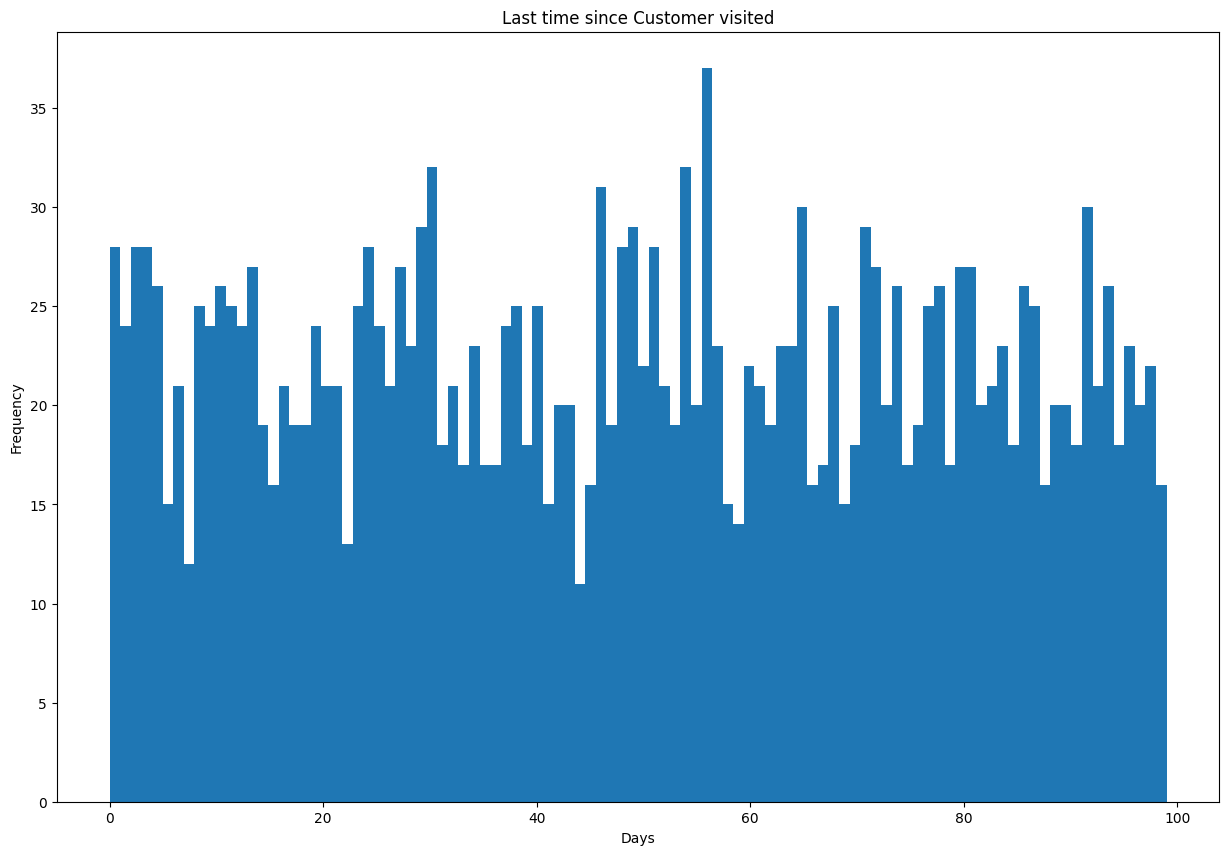

In [92]:
# Visualisation of Times since customers have been at the store
plt.figure(figsize = (15, 10))
plt.xlabel('Days')
raw_df['Recency'].plot(kind = 'hist', bins=100, title='Last time since Customer visited')

# fairly random/equal

In [74]:
# checking Kids column
raw_df['Kidhome']

0       0
1       1
2       0
3       1
4       1
       ..
2235    0
2236    2
2237    0
2238    0
2239    1
Name: Kidhome, Length: 2213, dtype: int64

In [75]:
# checking Teens column
raw_df['Teenhome'].value_counts()

0    1145
1    1017
2      51
Name: Teenhome, dtype: int64

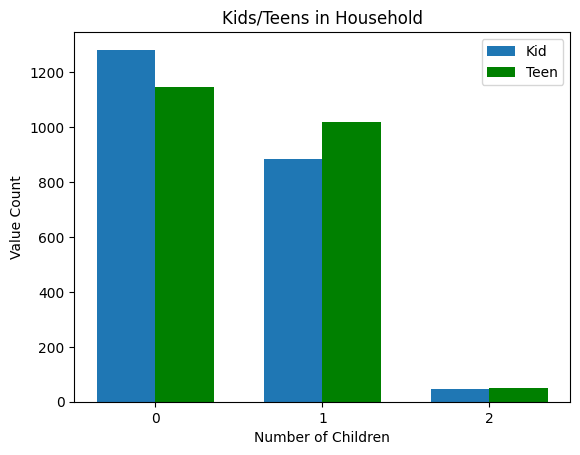

In [76]:
# Plot kids/teen home as bar chart
# set bars and width of bar
x = np.arange(3)
width = 0.35

# plot bar graph
fig, ax = plt.subplots()
graph1 = ax.bar(x - width/2, raw_df['Kidhome'].value_counts(), width, label="Kid")
graph2 = ax.bar(x + width/2, raw_df['Teenhome'].value_counts(), width, label="Teen", color='g')
plt.legend()

# Label x axis and xtick
plt.xlabel("Number of Children")
ax.set_xticks([0, 1, 2])

# Label y axis
plt.ylabel("Value Count")

# Set title "Bar Graph"
plt.title("Kids/Teens in Household")

# Show chart
plt.show()

# Many people have no children in their house hold

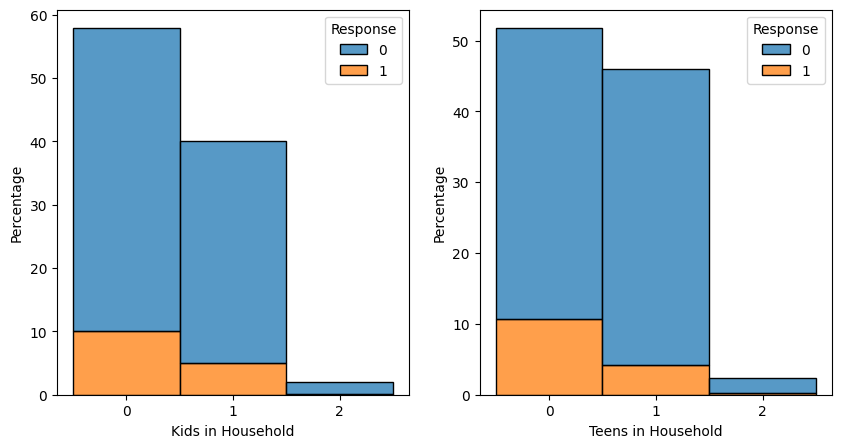

In [113]:
#Visualisation of the % of response of kids/teens in household
# figure/subplot
plt.figure(figsize = (10, 5))
plt.subplot(121)
#labels
plt.xlabel('Kids in Household')
plt.ylabel('Percentage')
#plot graph
sns.histplot(data=df, x='Kidhome', hue='Response',stat='percent', multiple='stack', discrete=True)
plt.xticks([0, 1, 2])

# teen
plt.subplot(122)
#labels
plt.xlabel('Teens in Household')
plt.ylabel('Percentage')
sns.histplot(data=df, x='Teenhome', hue='Response',stat='percent', multiple='stack', discrete=True)
plt.xticks([0, 1, 2])
plt.show()

# People with no kids or 1 kid are more likely to say yes.

In [77]:
# Checking marital status column
raw_df['Marital_Status'].unique()

# need to change some and sort the responses

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [78]:
# This looks like they're the same person (?) except for Response
raw_df[raw_df['Marital_Status'] == 'YOLO']

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Membership,Total Spend
2177,PhD,YOLO,48432.0,0,1,3,322,3,50,4,...,0,0,0,0,0,0,0,48,650,424
2202,PhD,YOLO,48432.0,0,1,3,322,3,50,4,...,0,0,0,0,0,0,1,48,650,424


In [80]:
# I will drop the 0 response because of imbalance
raw_df = raw_df.drop(2177)

In [81]:
# check if dropped
raw_df[raw_df['Marital_Status'] == 'YOLO']

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Membership,Total Spend
2202,PhD,YOLO,48432.0,0,1,3,322,3,50,4,...,0,0,0,0,0,0,1,48,650,424


In [83]:
# check others
raw_df[raw_df['Marital_Status'] == 'Alone']

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Membership,Total Spend
131,Master,Alone,61331.0,1,1,42,534,5,47,0,...,0,0,0,0,0,0,0,63,507,632
138,PhD,Alone,35860.0,1,1,37,15,0,8,4,...,1,0,0,0,0,0,1,48,72,49
153,Graduation,Alone,34176.0,1,0,12,5,7,24,19,...,0,0,0,0,0,0,0,33,79,89


In [84]:
# check others
raw_df[raw_df['Marital_Status'] == 'Absurd']

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Membership,Total Spend
2093,Graduation,Absurd,79244.0,0,0,58,471,102,125,212,...,0,0,1,1,0,0,1,28,588,1216
2134,Master,Absurd,65487.0,0,0,48,240,67,500,199,...,0,0,0,0,0,0,0,64,201,1169


In [85]:
# I am going change it so it is categorized to single, together/married, divorced and widow
# E.g. single, divorced, widow, alone and absurd are 0 and together, YOLO and married are 1
df = raw_df.replace({'Absurd': 'Single', 'Together': 'Married', 'Alone': 'Single', 'YOLO': 'Single'})

In [86]:
# checking if the marital_status have changed
df['Marital_Status'].nunique()

4

<AxesSubplot: xlabel='Marital Status', ylabel='Frequency'>

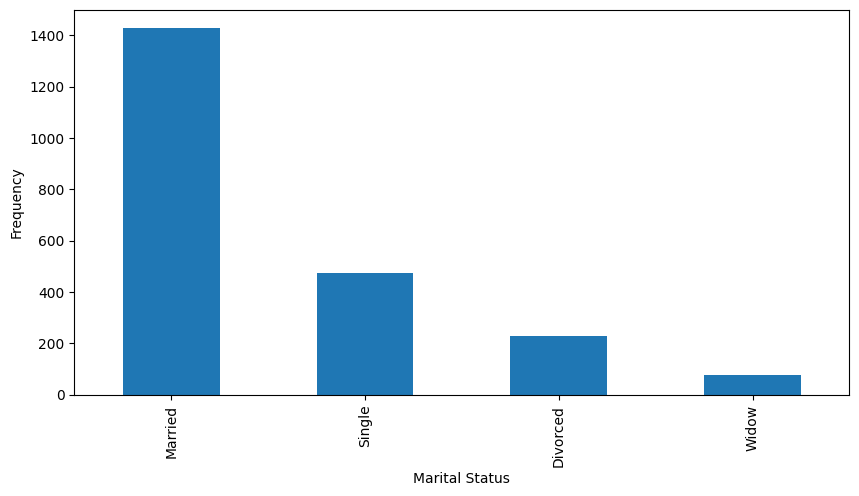

In [108]:
#Visualisation of the frequency of marital status
plt.figure(figsize = (10, 5))
plt.xlabel('Marital Status')
plt.ylabel('Frequency')
df['Marital_Status'].value_counts().plot.bar()

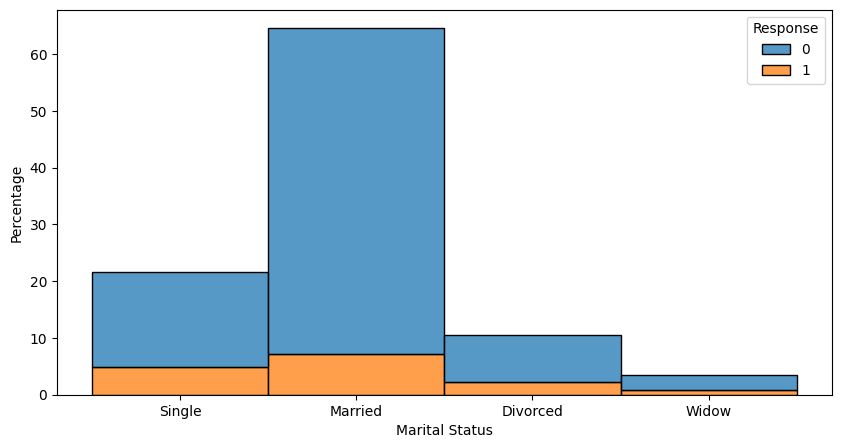

In [111]:
#Visualisation of the % of response of marital status
plt.figure(figsize = (10, 5))
plt.xlabel('Marital Status')
plt.ylabel('Percentage')
sns.histplot(data=df, x='Marital_Status', hue='Response',stat='percent', multiple='stack')
plt.show()

# single people are more likely to say yes, based on percentage

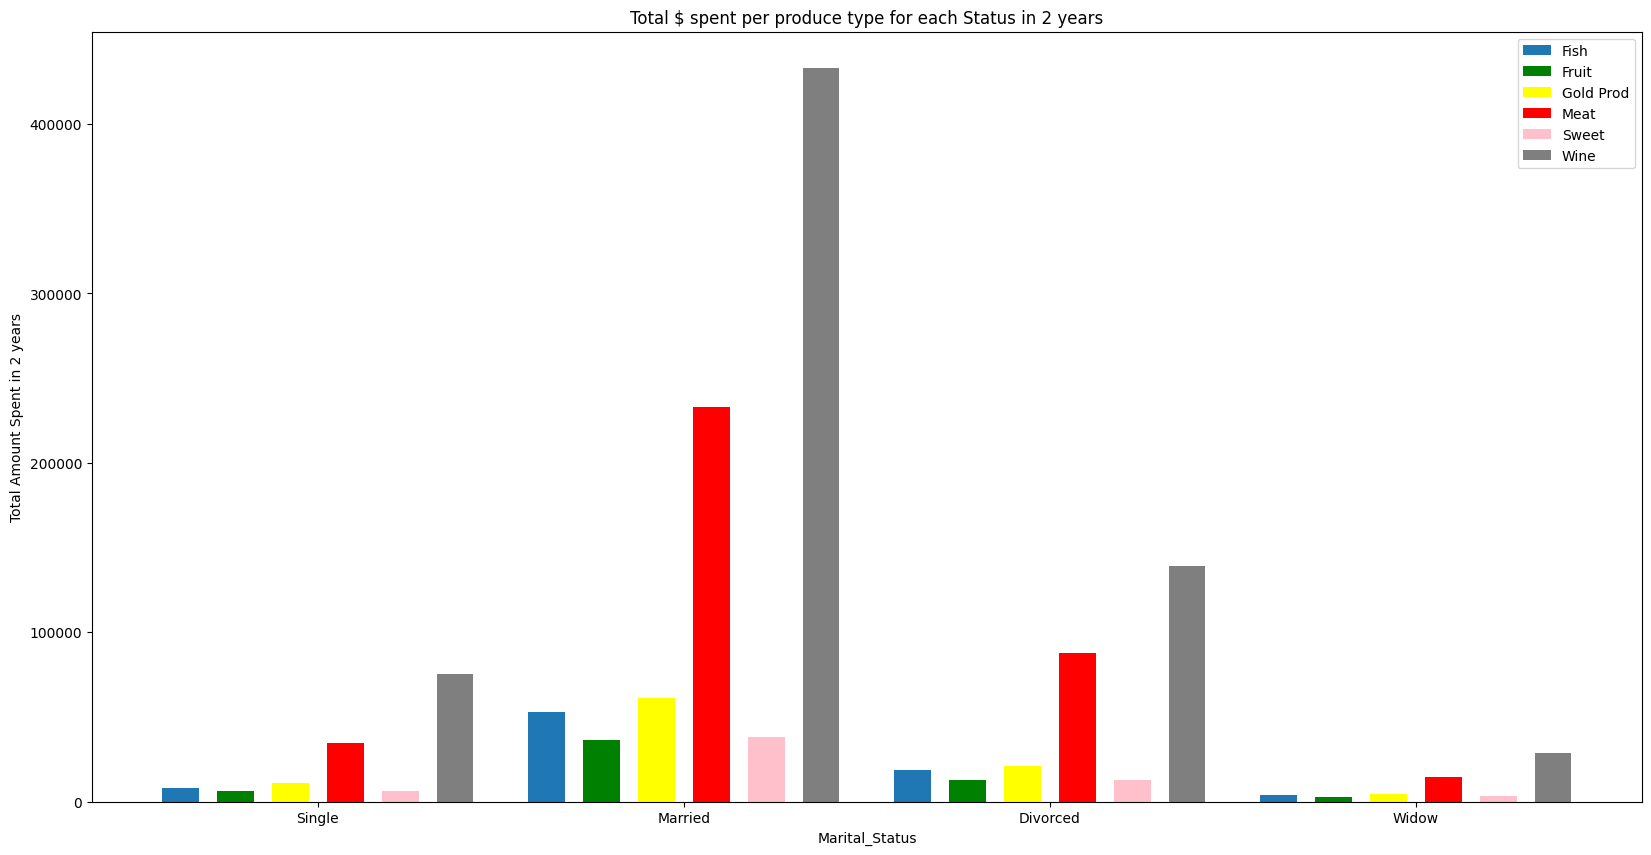

In [125]:
# Plot total $ of produce bought by Marital_Status
# set bars, set labels and set width of bar
x = np.arange(4)
labels = df['Marital_Status'].unique()
width = 0.1

#plot bar graph, group df by education, sum of amount spent on produce type
fig, ax = plt.subplots(figsize = (20, 10))
graph1 = ax.bar(x - 0.375, df.groupby('Marital_Status')['MntFishProducts'].sum(), width, label="Fish")
graph2 = ax.bar(x - 0.225, df.groupby('Marital_Status')['MntFruits'].sum(), width, label="Fruit", color='green')
graph3 = ax.bar(x - 0.075, df.groupby('Marital_Status')['MntGoldProds'].sum(), width, label="Gold Prod", color='yellow')
graph4 = ax.bar(x + 0.075, df.groupby('Marital_Status')['MntMeatProducts'].sum(), width, label="Meat", color='red')
graph5 = ax.bar(x + 0.225, df.groupby('Marital_Status')['MntSweetProducts'].sum(), width, label="Sweet", color='pink')
graph6 = ax.bar(x + 0.375, df.groupby('Marital_Status')['MntWines'].sum(), width, label="Wine", color='black', alpha = 0.5)

#label by colour
plt.legend()

# Label x axis
ax.set_xlabel('Marital_Status')
# set xtick
ax.xaxis.set_ticks(x)
# label xticks
ax.set_xticklabels(labels)

# Label y axis
plt.ylabel("Total Amount Spent in 2 years")

# Set title "Bar Graph"
plt.title("Total $ spent per produce type for each Status in 2 years")

# Show chart
plt.show()

# A lot of money spent on wine then meat. Because be because of quantity or could be the wines are expensive.

In [91]:
# checking if the marital_status have changed
df['Education'].unique()
# There 5 different values of Education, had to search up 2n Cycle. Which is equal to Master degree. Graduation = Bachelor.

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [93]:
df = df.replace({'2n Cycle': 'Master', 'Graduation': 'Bachelor'})
df['Education'].nunique()

4

<AxesSubplot: xlabel='Education', ylabel='Frequency'>

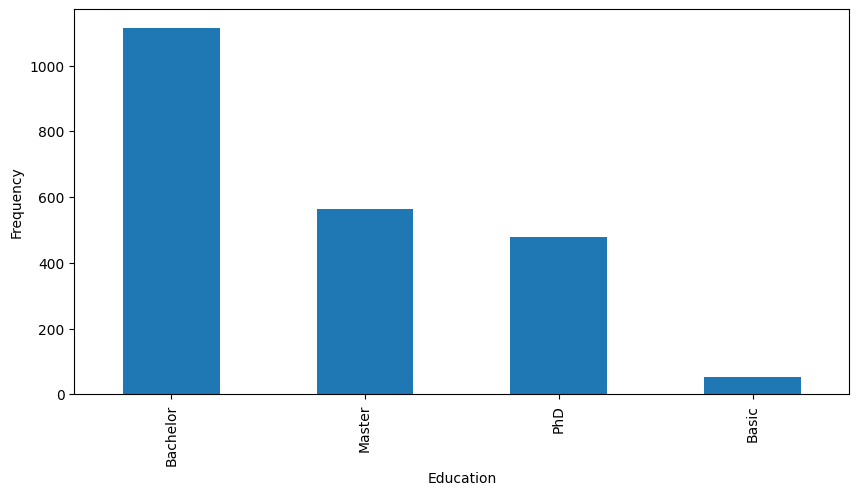

In [126]:
#Visualisation of the frequency of education
plt.figure(figsize = (10, 5))
plt.xlabel('Education')
plt.ylabel('Frequency')
df['Education'].value_counts().plot.bar()

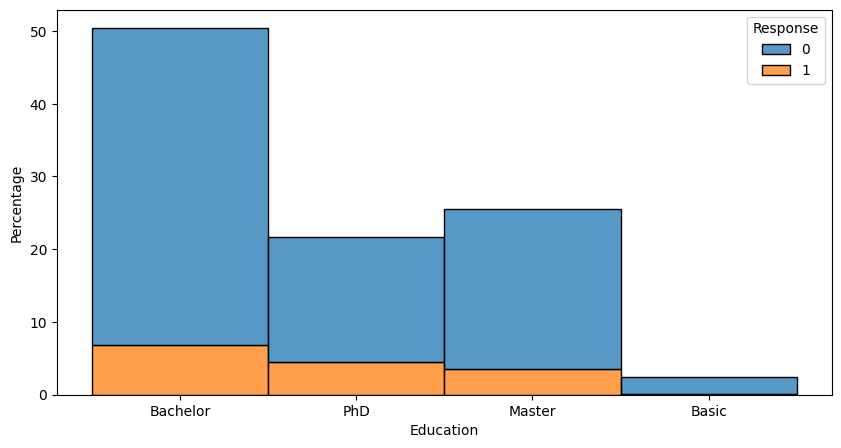

In [110]:
#Visualisation of the % of response of education
plt.figure(figsize = (10, 5))
plt.xlabel('Education')
plt.ylabel('Percentage')
sns.histplot(data=df, x='Education', hue='Response',stat='percent', multiple='stack')
plt.show()

# people with PhD are more likely to say yes.

In [95]:
# I want to initially predict the likelihood of customers complaining but there might be too little data to work with.
raw_df[raw_df['Complain'] == 1].count().head()

Education         20
Marital_Status    20
Income            20
Kidhome           20
Teenhome          20
dtype: int64

Correlation Plot Of Selected Features


<Figure size 640x480 with 0 Axes>

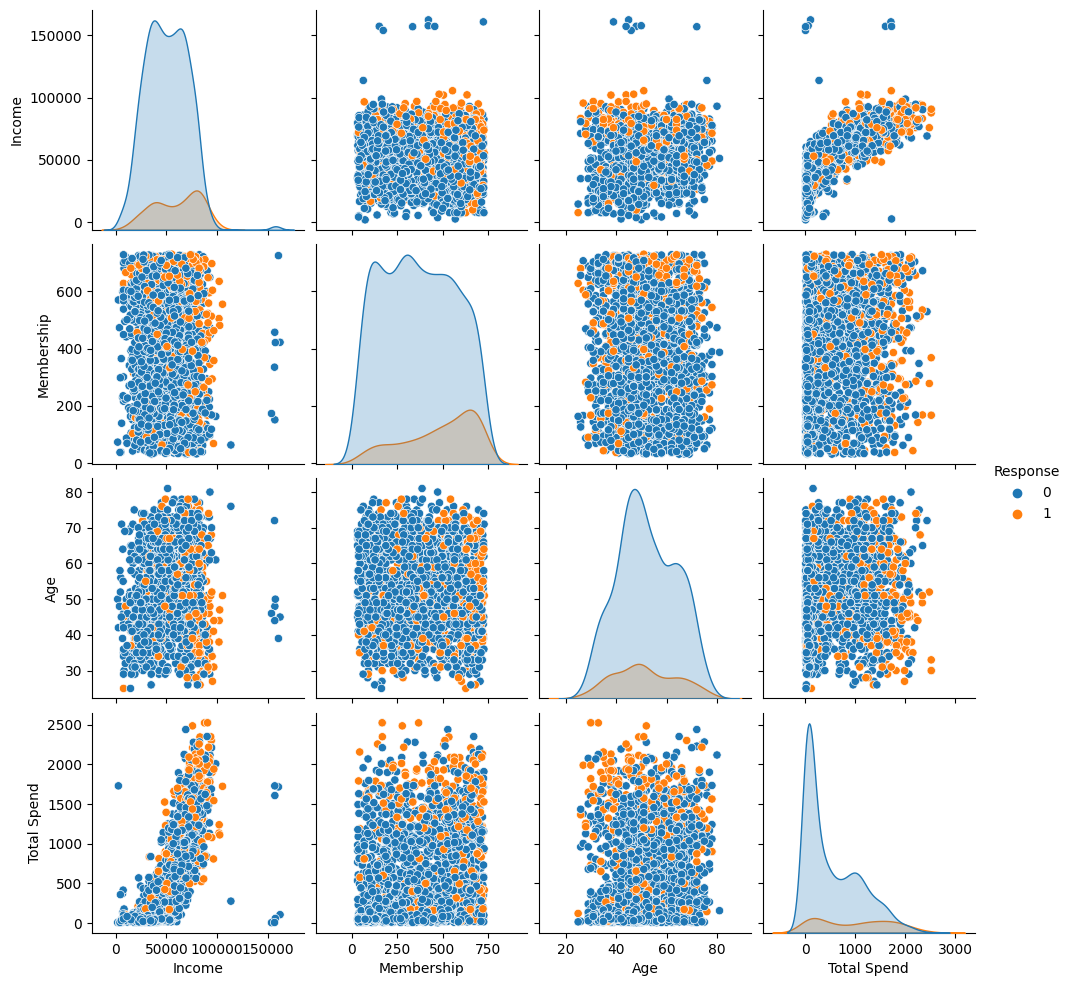

In [131]:
#To plot some selected features 

#Plotting following features
To_Plot = ['Income', 'Education', 'Membership', 'Age', 'Total Spend', 'Marital_Status', 'Response']
#Title
print("Correlation Plot Of Selected Features")

#plot graph
plt.figure()
fig = sns.pairplot(df[To_Plot], hue= 'Response')

plt.show()

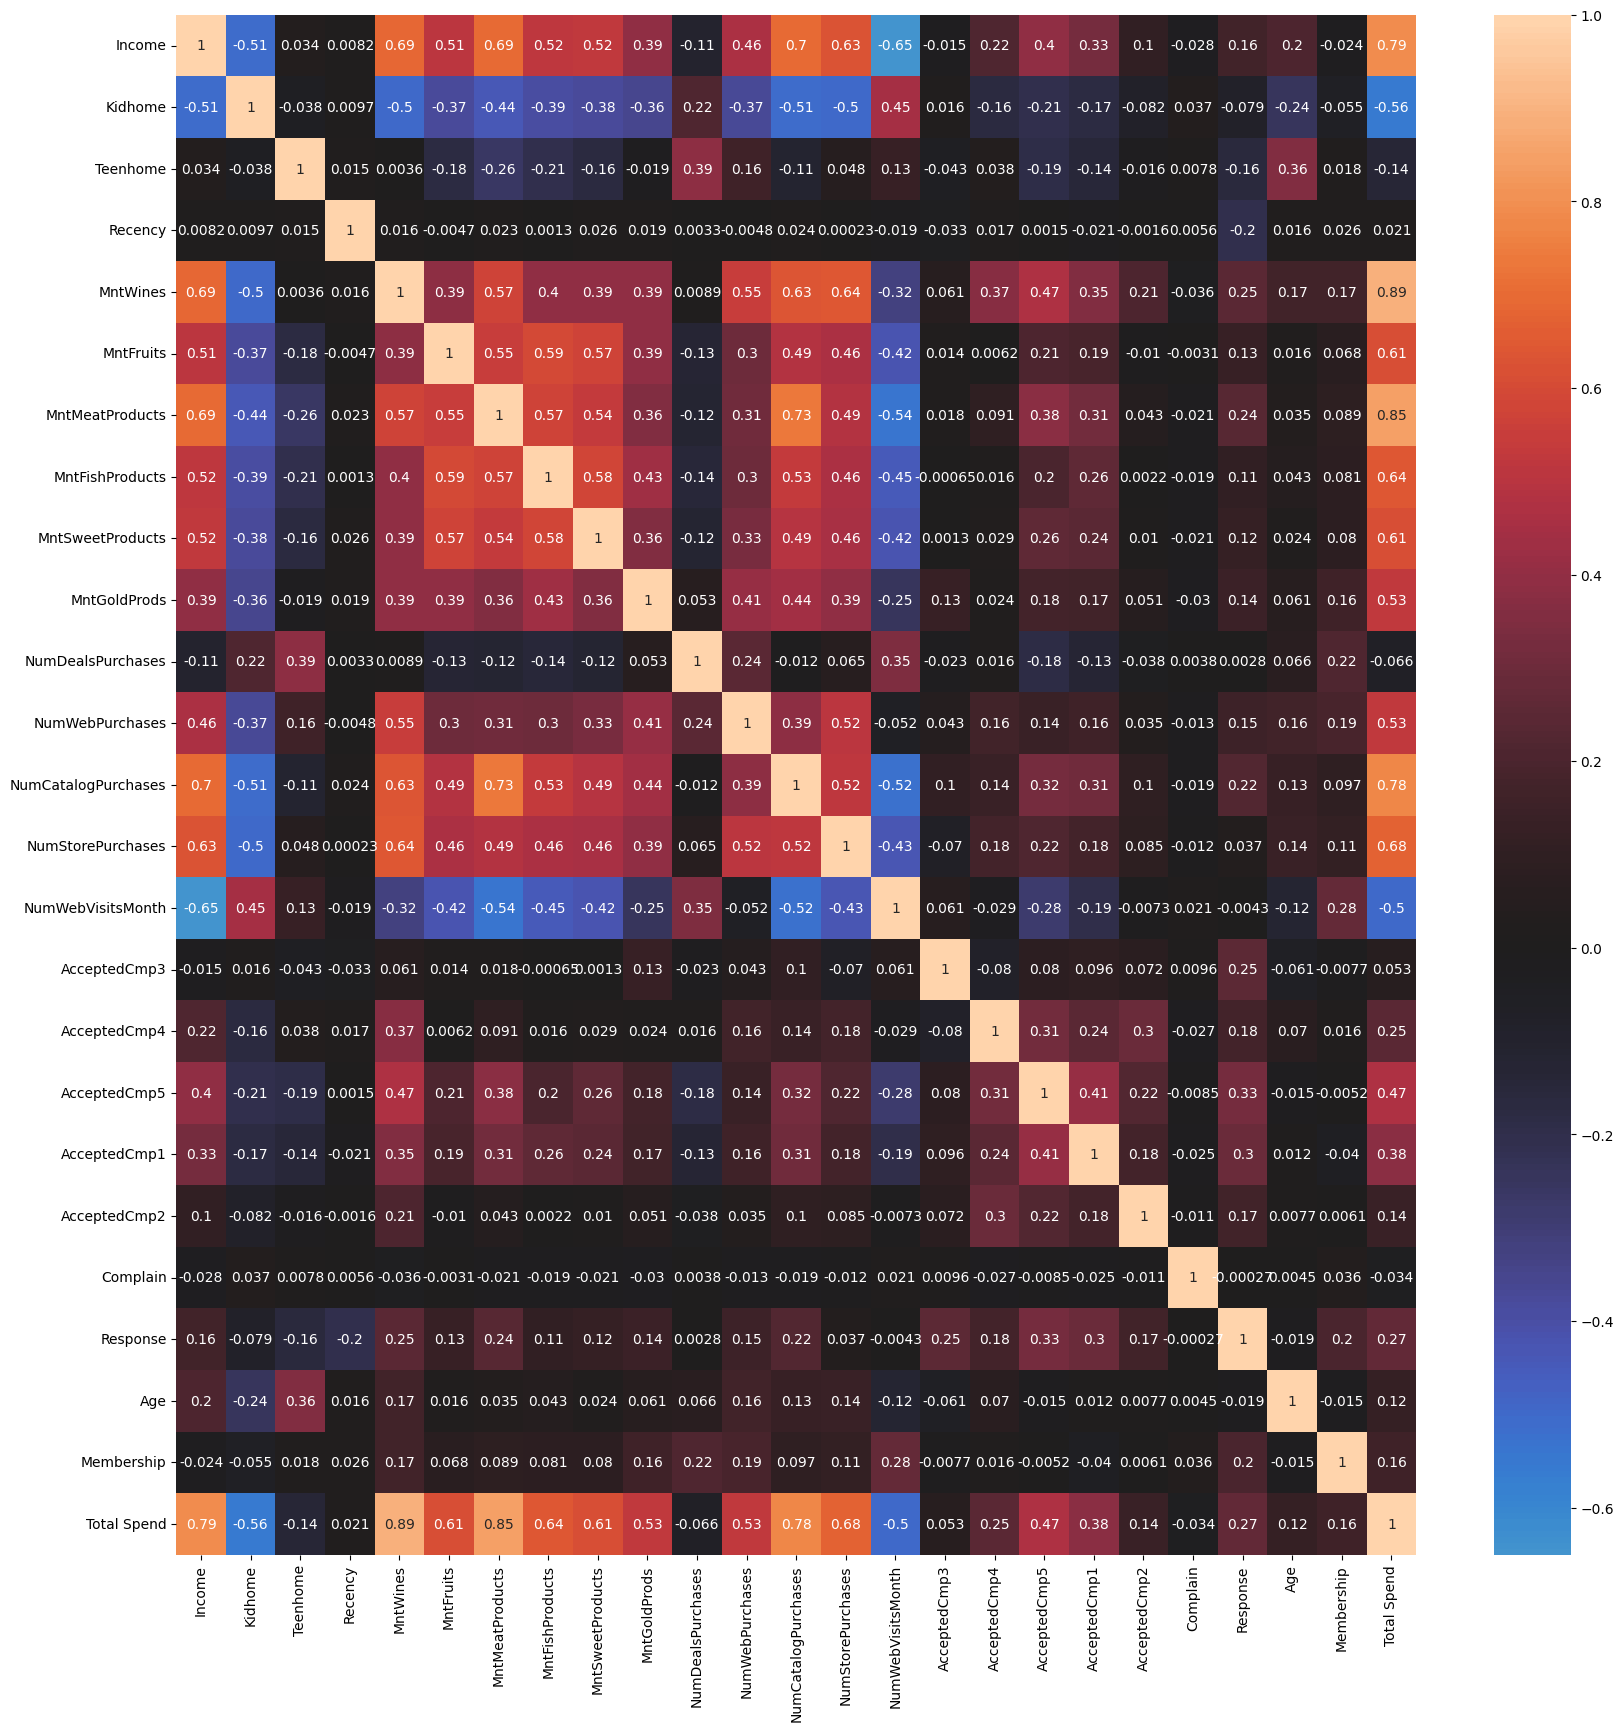

In [137]:
# Correlation Heatmap
plt.figure(figsize=(20,20))  
heatmap = sns.heatmap(df.corr(),annot=True, center=0)
# To save as image
#fig = heatmap.get_figure()
#fig.savefig("out.png") 

In [115]:
X = df \
    .pipe(lambda x: pd.get_dummies(x, drop_first=True)) \
    .dropna()
X.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Response,Age,Membership,Total Spend,Education_Basic,Education_Master,Education_PhD,Marital_Status_Married,Marital_Status_Single,Marital_Status_Widow
0,58138.0,0,0,58,635,88,546,172,88,88,...,1,64,694,1617,0,0,0,0,1,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,67,144,27,0,0,0,0,1,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,0,56,343,776,0,0,0,1,0,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,0,37,170,53,0,0,0,1,0,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,40,192,422,0,0,1,1,0,0


<AxesSubplot: >

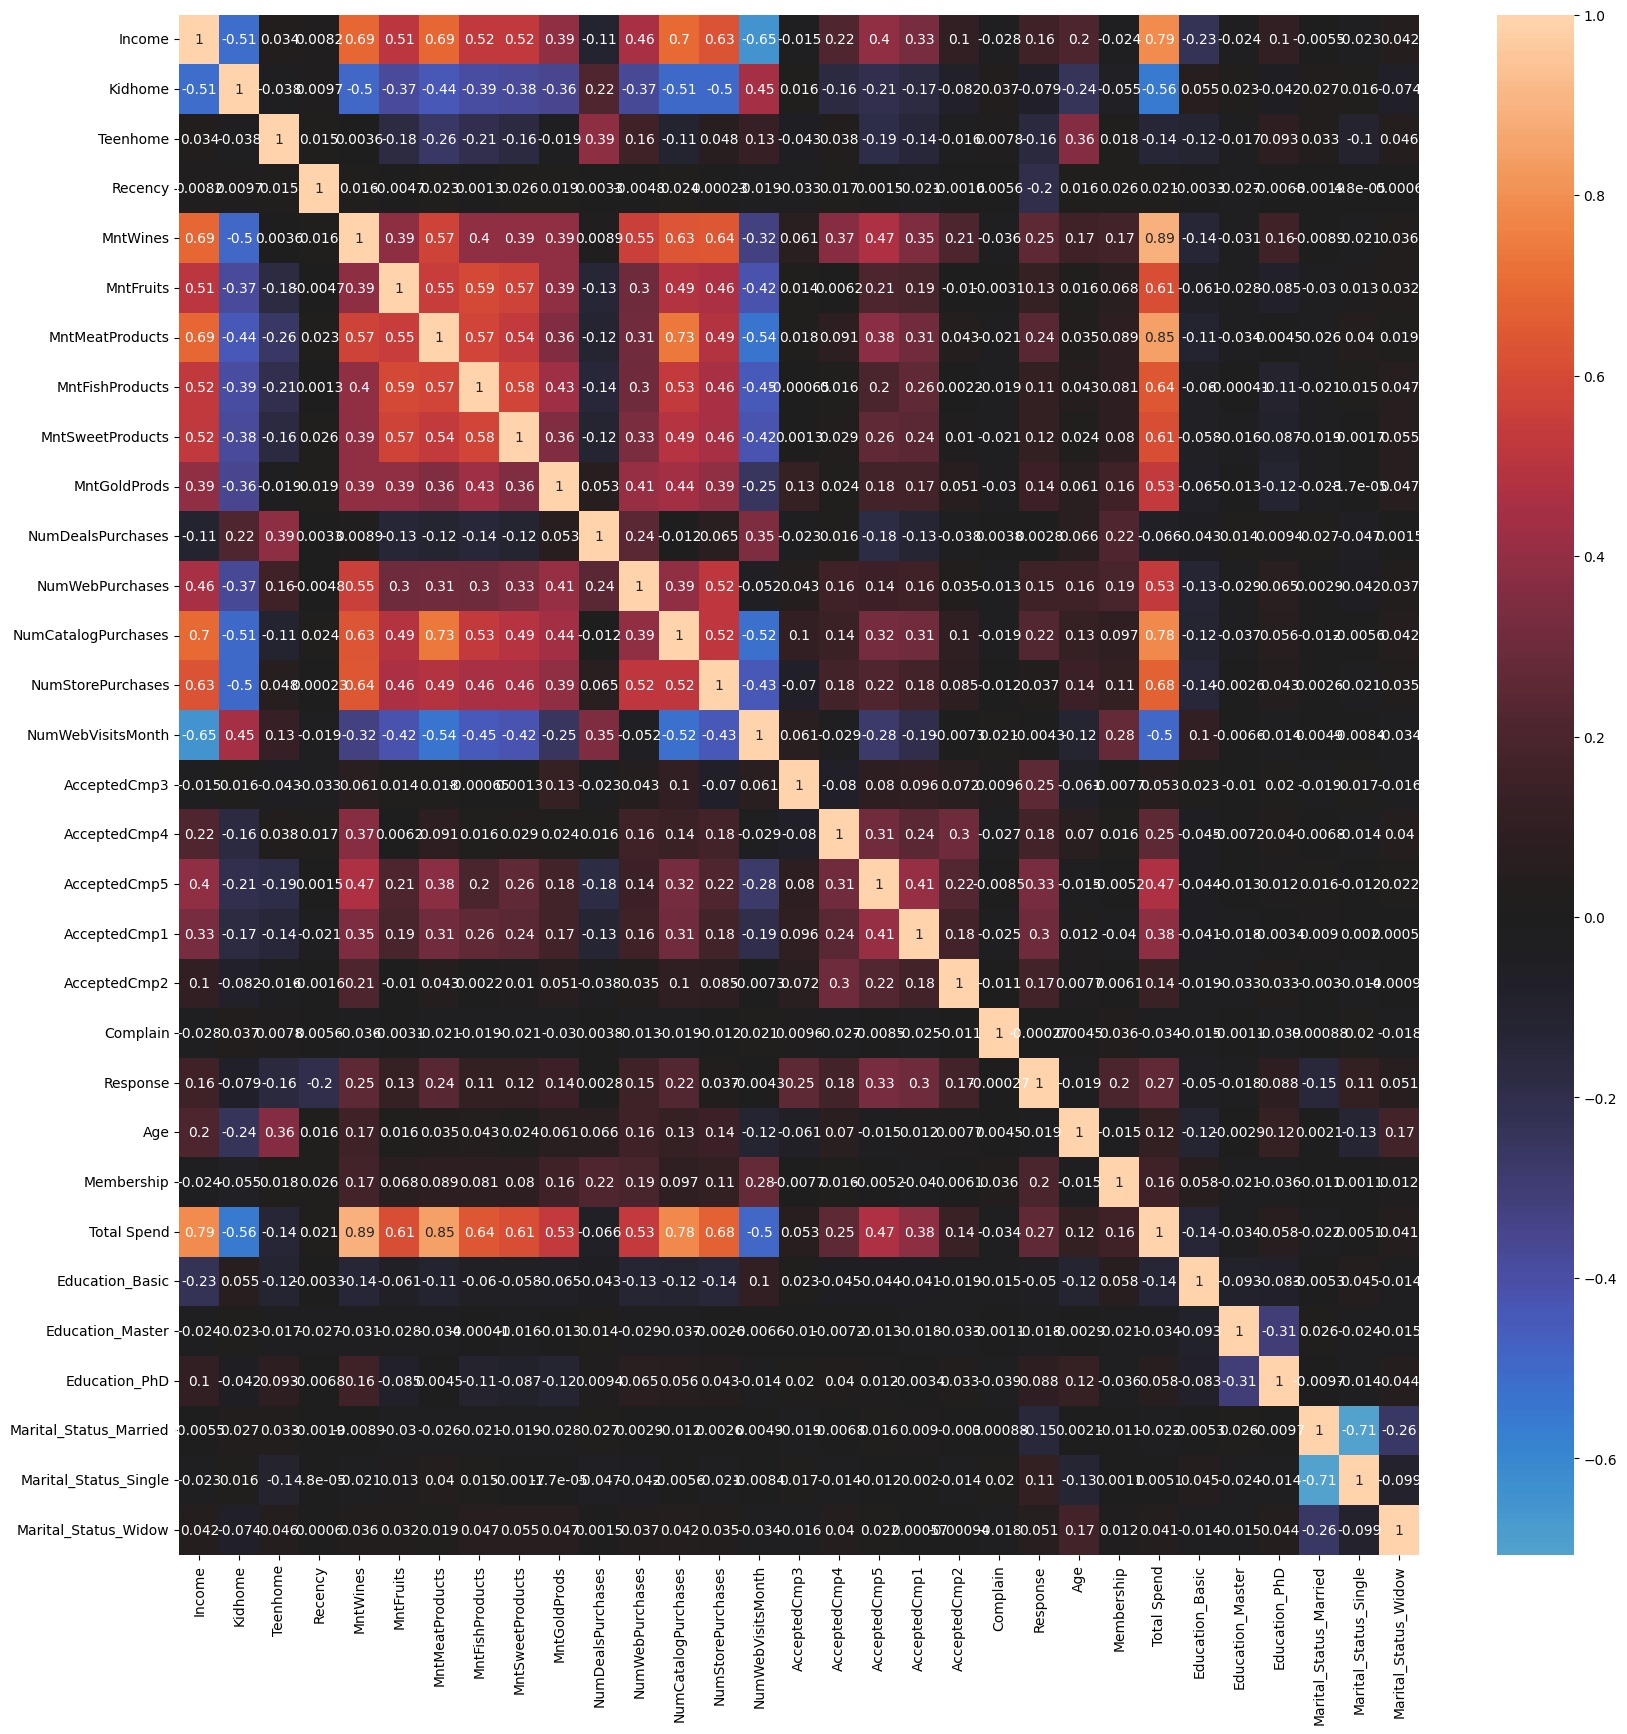

In [118]:
# Visualisation of the correlation with education and etc
plt.figure(figsize=(20,20))  
sns.heatmap(X.corr(),annot=True, center=0)

### Save CVS

In [119]:
X.to_csv('Customer.csv', index = False)